<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [1]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# print("Using tensorflow version " + str(tf.__version__))
# print("Using keras version " + str(keras.__version__))

/home/josebarretto/anaconda3/envs/study/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/josebarretto/anaconda3/envs/study/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/josebarretto/anaconda3/envs/study/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/josebarretto/anaconda3/en

## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")
print('train data format - X:', train_images.shape, ', y:', train_labels.shape)
print('test data format - X:', test_images.shape, ', y:', test_labels.shape)

train data format - X: (60000, 28, 28) , y: (60000,)
test data format - X: (10000, 28, 28) , y: (10000,)


In [3]:
from keras.utils.np_utils import to_categorical

num_categories = 10

train_labels = to_categorical(train_labels, num_categories)
test_labels = to_categorical(test_labels, num_categories)

In [4]:
# Reshape to proper images with 1 color channel according to backend scheme
train_images = train_images.reshape(len(train_images), -1)
test_images = test_images.reshape(len(test_images), -1)

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
eps = 1e-7

# calculate statistics from training data
mean = np.mean(train_images)
std = np.std(train_images) + eps # sum eps to avoid division by zero

# normalize using training data statistics - avoids data leakage
normal_train_images = (train_images - mean)/std
normal_test_images = (test_images - mean)/std

## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [5]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

input_shape = train_images.shape[1]
n_labels = 10

In [6]:
# linear classifier model from the first exercise
linear_classifier = Sequential([
    Dense(n_labels, input_shape=(input_shape,), activation='softmax')
])

linear_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [7]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# fully connected network
model = Sequential([
    Dense(300, input_shape=(input_shape,), activation='sigmoid'),
    Dense(n_labels, activation='softmax')
])

opt = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [8]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10
history = model.fit(
    normal_train_images, train_labels,
    batch_size = 128,
    epochs = epochs,
    verbose = 1,
    validation_data = (normal_test_images, test_labels)
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 1.2033 - accuracy: 0.7312 - val_loss: 0.7183 - val_accuracy: 0.8519
Epoch 2/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.6202 - accuracy: 0.8584 - val_loss: 0.5166 - val_accuracy: 0.8785
Epoch 3/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.4940 - accuracy: 0.8771 - val_loss: 0.4392 - val_accuracy: 0.8895
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4355 - accuracy: 0.8871 - val_loss: 0.3966 - val_accuracy: 0.8974
Epoch 5/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.4006 - accuracy: 0.8930 - val_loss: 0.3692 - val_accuracy: 0.9018
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.3765 - accuracy: 0.8975 - val_loss: 0.3501 - val_accuracy: 0.9064
Epoch 7/10
60000/60000 [==============================] - 2s 25us/s

## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

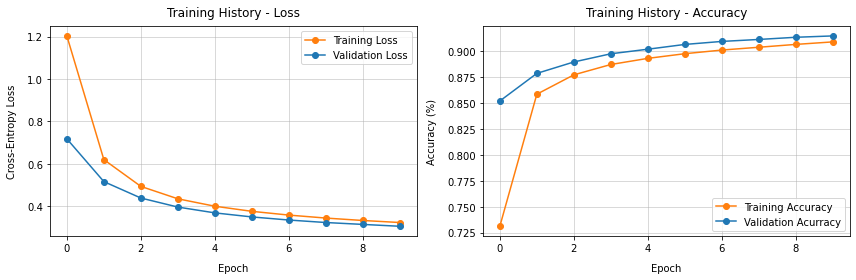

In [10]:
# We now want to plot the train and validation loss functions and accuracy curves

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(hist['loss'], '-o', c='tab:orange')
ax[0].plot(hist['val_loss'], '-o', c='tab:blue')
ax[0].legend(['Training Loss', 'Validation Loss'])
ax[0].set_xlabel('Epoch', labelpad=10)
ax[0].set_ylabel('Cross-Entropy Loss', labelpad=10)
ax[0].set_title('Training History - Loss', pad=10)
ax[0].grid(alpha=0.6)

ax[1].plot(hist['accuracy'], '-o', c='tab:orange')
ax[1].plot(hist['val_accuracy'], '-o', c='tab:blue')
ax[1].legend(['Training Accuracy', 'Validation Acurracy'])
ax[1].set_xlabel('Epoch', labelpad=10)
ax[1].set_ylabel('Accuracy (%)', labelpad=10)
ax[1].set_title('Training History - Accuracy', pad=10)
ax[1].grid(alpha=0.6)

plt.tight_layout()
plt.show()

## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

First, let's print the last network's training and validation accuracy.

In [30]:
print('Baseline Network Accuracy - Training:', 100*round(hist['accuracy'].iloc[-1], 5),
      '% - Validation:', 100*round(hist['val_accuracy'].iloc[-1], 5), '%')

Baseline Network Accuracy - Training: 90.885 % - Validation: 91.46 %


#### 1st Experiment: increasing batch size.

In [83]:
# create dict to store results
batch_dict = {128: {'accuracy': hist['accuracy'].iloc[-1], 'val_accuracy': hist['val_accuracy'].iloc[-1]}}

batches = [256, 512, 1024, 2048, 4096]
epochs = 10

for batch in batches:
    h = model.fit(
        normal_train_images, train_labels,
        batch_size = batch,
        epochs = epochs,
        verbose = 0,
        validation_data = (normal_test_images, test_labels)
    )
    
    df_h = pd.DataFrame(h.history)
    df_h['epoch'] = h.epoch
    batch_dict[batch] = {'accuracy': df_h['accuracy'].iloc[-1], 'val_accuracy': df_h['val_accuracy'].iloc[-1]}

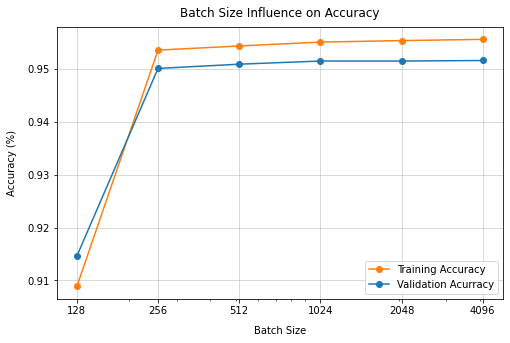

In [84]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(batch_dict.keys(), [d['accuracy'] for d in batch_dict.values()], '-o', c='tab:orange')
ax.plot(batch_dict.keys(), [d['val_accuracy'] for d in batch_dict.values()], '-o', c='tab:blue')
ax.set_xscale('log')
ax.set_ylabel('Accuracy (%)', labelpad=10)
ax.set_xlabel('Batch Size', labelpad=10)
ax.set_title('Batch Size Influence on Accuracy', pad=10)
batches = [128, 256, 512, 1024, 2048, 4096]
ax.set_xticks(batches)
ax.set_xticklabels(batches)
ax.legend(['Training Accuracy', 'Validation Acurracy'])
ax.grid(alpha=0.6)
plt.show()

We can see that increasing the batch size from 128 to 256 generates a significant increase in the accuracy of the model. Increasing it over 256 generates small training and validation accuracy gains, which do not come without an increase in memory usage due to larger batch sizes. Therefore, there is a clear tradeoff between accuracy and memory consumption - optimality can be achieved through experiments (as in the one above), since accuracy does not increase significantly after a certain batch size.

#### 2nd Experiment: replacing sigmoid with Relu.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.5543 - accuracy: 0.8429 - val_loss: 0.3203 - val_accuracy: 0.9111
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2997 - accuracy: 0.9146 - val_loss: 0.2608 - val_accuracy: 0.9264
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2509 - accuracy: 0.9290 - val_loss: 0.2297 - val_accuracy: 0.9361
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2210 - accuracy: 0.9377 - val_loss: 0.2083 - val_accuracy: 0.9413
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1994 - accuracy: 0.9443 - val_loss: 0.1913 - val_accuracy: 0.9470
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.1825 - accuracy: 0.9491 - val_loss: 0.1785 - val_accuracy: 0.9503
Epoch 7/10
60000/60000 [==============================] - 2s 28us/st

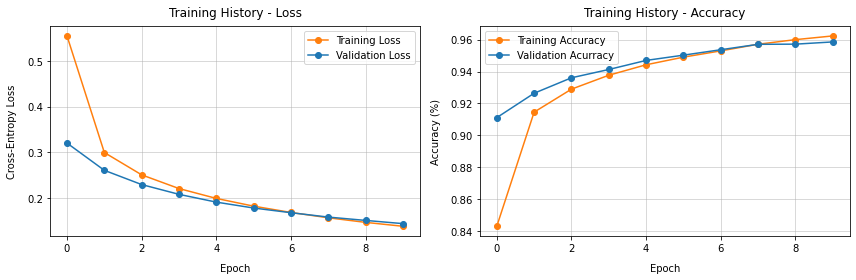

In [92]:
# fully connected network
model = Sequential([
    Dense(300, input_shape=(input_shape,), activation='relu'),
    Dense(n_labels, activation='softmax')
])

opt = optimizers.SGD(learning_rate = 0.01)
model.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

epochs = 10
history = model.fit(
    normal_train_images, train_labels,
    batch_size = 128,
    epochs = epochs,
    verbose = 1,
    validation_data = (normal_test_images, test_labels)
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# We now want to plot the train and validation loss functions and accuracy curves

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(hist['loss'], '-o', c='tab:orange')
ax[0].plot(hist['val_loss'], '-o', c='tab:blue')
ax[0].legend(['Training Loss', 'Validation Loss'])
ax[0].set_xlabel('Epoch', labelpad=10)
ax[0].set_ylabel('Cross-Entropy Loss', labelpad=10)
ax[0].set_title('Training History - Loss', pad=10)
ax[0].grid(alpha=0.6)

ax[1].plot(hist['accuracy'], '-o', c='tab:orange')
ax[1].plot(hist['val_accuracy'], '-o', c='tab:blue')
ax[1].legend(['Training Accuracy', 'Validation Acurracy'])
ax[1].set_xlabel('Epoch', labelpad=10)
ax[1].set_ylabel('Accuracy (%)', labelpad=10)
ax[1].set_title('Training History - Accuracy', pad=10)
ax[1].grid(alpha=0.6)

plt.tight_layout()
plt.show()

In [99]:
print('Using Sigmoid:', batch_dict[128])
print('Using ReLU:', '{\'accuracy:\'', hist['accuracy'].iloc[-1], ', \'val_accuracy:\'', hist['val_accuracy'].iloc[-1], '}')

Using Sigmoid: {'accuracy': 0.9088500142097473, 'val_accuracy': 0.9146000146865845}
Using ReLU: {'accuracy:' 0.9623666405677795 , 'val_accuracy:' 0.9585999846458435 }


We can see that, keeping all other parameters constant, switching the activation function to a ReLU significantly increased the validation accuracy - from 91.46% to 95.86%.

#### 3rd Experiment: designing a deeper network.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 2.2937 - accuracy: 0.1333 - val_loss: 2.2705 - val_accuracy: 0.2108
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 2.2524 - accuracy: 0.2424 - val_loss: 2.2300 - val_accuracy: 0.3969
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 2.2034 - accuracy: 0.3795 - val_loss: 2.1674 - val_accuracy: 0.3815
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 2.1229 - accuracy: 0.4602 - val_loss: 2.0626 - val_accuracy: 0.5082
Epoch 5/10
60000/60000 [==============================] - 2s 33us/step - loss: 1.9888 - accuracy: 0.5206 - val_loss: 1.8940 - val_accuracy: 0.5143
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 1.7962 - accuracy: 0.5586 - val_loss: 1.6812 - val_accuracy: 0.5800
Epoch 7/10
60000/60000 [==============================] - 2s 33us/st

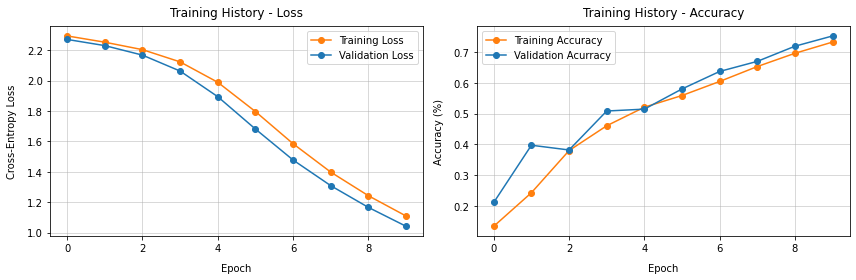

In [102]:
# fully connected network
model = Sequential([
    Dense(300, input_shape=(input_shape,), activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(84, activation='sigmoid'),
    Dense(n_labels, activation='softmax')
])

opt = optimizers.SGD(learning_rate = 0.01)
model.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

epochs = 10
history = model.fit(
    normal_train_images, train_labels,
    batch_size = 128,
    epochs = epochs,
    verbose = 1,
    validation_data = (normal_test_images, test_labels)
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# We now want to plot the train and validation loss functions and accuracy curves

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(hist['loss'], '-o', c='tab:orange')
ax[0].plot(hist['val_loss'], '-o', c='tab:blue')
ax[0].legend(['Training Loss', 'Validation Loss'])
ax[0].set_xlabel('Epoch', labelpad=10)
ax[0].set_ylabel('Cross-Entropy Loss', labelpad=10)
ax[0].set_title('Training History - Loss', pad=10)
ax[0].grid(alpha=0.6)

ax[1].plot(hist['accuracy'], '-o', c='tab:orange')
ax[1].plot(hist['val_accuracy'], '-o', c='tab:blue')
ax[1].legend(['Training Accuracy', 'Validation Acurracy'])
ax[1].set_xlabel('Epoch', labelpad=10)
ax[1].set_ylabel('Accuracy (%)', labelpad=10)
ax[1].set_title('Training History - Accuracy', pad=10)
ax[1].grid(alpha=0.6)

plt.tight_layout()
plt.show()

We can see that the model is converging, but slower than the previous one. For this reason, it has a lower validation accuracy on 10 epochs than the previous baseline model. Now, let's apply an earling stopping technique and train the model to achieve minimum loss using cross-validation. Then, let's measure the test error and compare with the baseline model.

Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 [==============================] - 2s 35us/step - loss: 0.4388 - accuracy: 0.8834 - val_loss: 0.4117 - val_accuracy: 0.8916
Epoch 2/1000
48000/48000 [==============================] - 2s 35us/step - loss: 0.4271 - accuracy: 0.8853 - val_loss: 0.4012 - val_accuracy: 0.8938
Epoch 3/1000
48000/48000 [==============================] - 2s 35us/step - loss: 0.4166 - accuracy: 0.8875 - val_loss: 0.3915 - val_accuracy: 0.8963
Epoch 4/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.4071 - accuracy: 0.8899 - val_loss: 0.3831 - val_accuracy: 0.8972
Epoch 5/1000
48000/48000 [==============================] - 2s 38us/step - loss: 0.3983 - accuracy: 0.8913 - val_loss: 0.3751 - val_accuracy: 0.8992
Epoch 6/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.3903 - accuracy: 0.8929 - val_loss: 0.3676 - val_accuracy: 0.9007
Epoch 7/1000
48000/48000 [==============================

48000/48000 [==============================] - 2s 41us/step - loss: 0.2214 - accuracy: 0.9371 - val_loss: 0.2191 - val_accuracy: 0.9398
Epoch 56/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.2192 - accuracy: 0.9377 - val_loss: 0.2173 - val_accuracy: 0.9401
Epoch 57/1000
48000/48000 [==============================] - 2s 35us/step - loss: 0.2170 - accuracy: 0.9384 - val_loss: 0.2158 - val_accuracy: 0.9399
Epoch 58/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.2149 - accuracy: 0.9393 - val_loss: 0.2138 - val_accuracy: 0.9409
Epoch 59/1000
48000/48000 [==============================] - 2s 43us/step - loss: 0.2129 - accuracy: 0.9399 - val_loss: 0.2120 - val_accuracy: 0.9414
Epoch 60/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.2108 - accuracy: 0.9405 - val_loss: 0.2102 - val_accuracy: 0.9422
Epoch 61/1000
48000/48000 [==============================] - 2s 36us/step - loss: 0.2087 - accuracy: 0.9415 - val_

48000/48000 [==============================] - 2s 40us/step - loss: 0.1335 - accuracy: 0.9635 - val_loss: 0.1464 - val_accuracy: 0.9589
Epoch 110/1000
48000/48000 [==============================] - 2s 42us/step - loss: 0.1324 - accuracy: 0.9639 - val_loss: 0.1454 - val_accuracy: 0.9592
Epoch 111/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.1313 - accuracy: 0.9641 - val_loss: 0.1447 - val_accuracy: 0.9592
Epoch 112/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.1301 - accuracy: 0.9647 - val_loss: 0.1436 - val_accuracy: 0.9597
Epoch 113/1000
48000/48000 [==============================] - 2s 43us/step - loss: 0.1290 - accuracy: 0.9647 - val_loss: 0.1428 - val_accuracy: 0.9603
Epoch 114/1000
48000/48000 [==============================] - 2s 43us/step - loss: 0.1279 - accuracy: 0.9655 - val_loss: 0.1421 - val_accuracy: 0.9603
Epoch 115/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.1268 - accuracy: 0.9658 

48000/48000 [==============================] - 2s 47us/step - loss: 0.0862 - accuracy: 0.9774 - val_loss: 0.1122 - val_accuracy: 0.9690
Epoch 164/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0855 - accuracy: 0.9777 - val_loss: 0.1113 - val_accuracy: 0.9690
Epoch 165/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0848 - accuracy: 0.9780 - val_loss: 0.1110 - val_accuracy: 0.9689
Epoch 166/1000
48000/48000 [==============================] - 2s 32us/step - loss: 0.0842 - accuracy: 0.9779 - val_loss: 0.1105 - val_accuracy: 0.9688
Epoch 167/1000
48000/48000 [==============================] - 2s 33us/step - loss: 0.0835 - accuracy: 0.9784 - val_loss: 0.1104 - val_accuracy: 0.9691
Epoch 168/1000
48000/48000 [==============================] - 2s 36us/step - loss: 0.0829 - accuracy: 0.9786 - val_loss: 0.1096 - val_accuracy: 0.9695
Epoch 169/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.0823 - accuracy: 0.9787 

48000/48000 [==============================] - 2s 43us/step - loss: 0.0580 - accuracy: 0.9861 - val_loss: 0.0951 - val_accuracy: 0.9734
Epoch 218/1000
48000/48000 [==============================] - 2s 43us/step - loss: 0.0576 - accuracy: 0.9862 - val_loss: 0.0950 - val_accuracy: 0.9735
Epoch 219/1000
48000/48000 [==============================] - 2s 41us/step - loss: 0.0572 - accuracy: 0.9864 - val_loss: 0.0948 - val_accuracy: 0.9736
Epoch 220/1000
48000/48000 [==============================] - 2s 41us/step - loss: 0.0567 - accuracy: 0.9865 - val_loss: 0.0944 - val_accuracy: 0.9740
Epoch 221/1000
48000/48000 [==============================] - 2s 41us/step - loss: 0.0564 - accuracy: 0.9865 - val_loss: 0.0942 - val_accuracy: 0.9737
Epoch 222/1000
48000/48000 [==============================] - 2s 34us/step - loss: 0.0560 - accuracy: 0.9868 - val_loss: 0.0939 - val_accuracy: 0.9737
Epoch 223/1000
48000/48000 [==============================] - 2s 38us/step - loss: 0.0555 - accuracy: 0.9866 

48000/48000 [==============================] - 2s 38us/step - loss: 0.0397 - accuracy: 0.9914 - val_loss: 0.0860 - val_accuracy: 0.9747
Epoch 272/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.0394 - accuracy: 0.9916 - val_loss: 0.0859 - val_accuracy: 0.9748
Epoch 273/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.0391 - accuracy: 0.9916 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch 274/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.0389 - accuracy: 0.9917 - val_loss: 0.0858 - val_accuracy: 0.9748
Epoch 275/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.0386 - accuracy: 0.9918 - val_loss: 0.0856 - val_accuracy: 0.9753
Epoch 276/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.0384 - accuracy: 0.9919 - val_loss: 0.0855 - val_accuracy: 0.9750
Epoch 277/1000
48000/48000 [==============================] - 2s 32us/step - loss: 0.0381 - accuracy: 0.9919 

48000/48000 [==============================] - 2s 42us/step - loss: 0.0276 - accuracy: 0.9956 - val_loss: 0.0811 - val_accuracy: 0.9767
Epoch 326/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0274 - accuracy: 0.9956 - val_loss: 0.0810 - val_accuracy: 0.9763
Epoch 327/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0272 - accuracy: 0.9958 - val_loss: 0.0810 - val_accuracy: 0.9765
Epoch 328/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0270 - accuracy: 0.9959 - val_loss: 0.0808 - val_accuracy: 0.9768
Epoch 329/1000
48000/48000 [==============================] - 2s 36us/step - loss: 0.0268 - accuracy: 0.9959 - val_loss: 0.0808 - val_accuracy: 0.9768
Epoch 330/1000
48000/48000 [==============================] - 2s 34us/step - loss: 0.0267 - accuracy: 0.9959 - val_loss: 0.0807 - val_accuracy: 0.9762
Epoch 331/1000
48000/48000 [==============================] - 2s 38us/step - loss: 0.0265 - accuracy: 0.9959 

48000/48000 [==============================] - 2s 42us/step - loss: 0.0195 - accuracy: 0.9977 - val_loss: 0.0782 - val_accuracy: 0.9771
Epoch 380/1000
48000/48000 [==============================] - 2s 42us/step - loss: 0.0193 - accuracy: 0.9977 - val_loss: 0.0781 - val_accuracy: 0.9771
Epoch 381/1000
48000/48000 [==============================] - 2s 35us/step - loss: 0.0192 - accuracy: 0.9978 - val_loss: 0.0781 - val_accuracy: 0.9770
Epoch 382/1000
48000/48000 [==============================] - 2s 37us/step - loss: 0.0191 - accuracy: 0.9978 - val_loss: 0.0780 - val_accuracy: 0.9772
Epoch 383/1000
48000/48000 [==============================] - 2s 41us/step - loss: 0.0190 - accuracy: 0.9979 - val_loss: 0.0780 - val_accuracy: 0.9771
Epoch 384/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0189 - accuracy: 0.9978 - val_loss: 0.0781 - val_accuracy: 0.9773
Epoch 385/1000
48000/48000 [==============================] - 2s 41us/step - loss: 0.0188 - accuracy: 0.9979 

48000/48000 [==============================] - 2s 40us/step - loss: 0.0141 - accuracy: 0.9988 - val_loss: 0.0771 - val_accuracy: 0.9777
Epoch 434/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0140 - accuracy: 0.9989 - val_loss: 0.0768 - val_accuracy: 0.9779
Epoch 435/1000
48000/48000 [==============================] - 2s 43us/step - loss: 0.0140 - accuracy: 0.9988 - val_loss: 0.0768 - val_accuracy: 0.9777
Epoch 436/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0139 - accuracy: 0.9988 - val_loss: 0.0768 - val_accuracy: 0.9779
Epoch 437/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0138 - accuracy: 0.9989 - val_loss: 0.0768 - val_accuracy: 0.9782
Epoch 438/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0137 - accuracy: 0.9989 - val_loss: 0.0768 - val_accuracy: 0.9781
Epoch 439/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0136 - accuracy: 0.9989 

48000/48000 [==============================] - 2s 39us/step - loss: 0.0106 - accuracy: 0.9994 - val_loss: 0.0764 - val_accuracy: 0.9776
Epoch 488/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0105 - accuracy: 0.9994 - val_loss: 0.0763 - val_accuracy: 0.9777
Epoch 489/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0104 - accuracy: 0.9994 - val_loss: 0.0764 - val_accuracy: 0.9779
Epoch 490/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0104 - accuracy: 0.9994 - val_loss: 0.0762 - val_accuracy: 0.9780
Epoch 491/1000
48000/48000 [==============================] - 2s 39us/step - loss: 0.0104 - accuracy: 0.9994 - val_loss: 0.0763 - val_accuracy: 0.9775
Epoch 492/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0103 - accuracy: 0.9993 - val_loss: 0.0763 - val_accuracy: 0.9778
Epoch 493/1000
48000/48000 [==============================] - 2s 40us/step - loss: 0.0102 - accuracy: 0.9994 

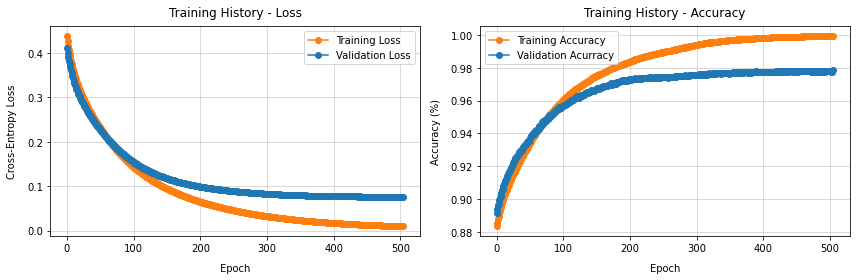

In [104]:
epochs = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    normal_train_images, train_labels,
    batch_size = 128,
    epochs = epochs,
    verbose = 1,
    validation_split = 0.2,
    callbacks = [early_stop]
)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# We now want to plot the train and validation loss functions and accuracy curves

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(hist['loss'], '-o', c='tab:orange')
ax[0].plot(hist['val_loss'], '-o', c='tab:blue')
ax[0].legend(['Training Loss', 'Validation Loss'])
ax[0].set_xlabel('Epoch', labelpad=10)
ax[0].set_ylabel('Cross-Entropy Loss', labelpad=10)
ax[0].set_title('Training History - Loss', pad=10)
ax[0].grid(alpha=0.6)

ax[1].plot(hist['accuracy'], '-o', c='tab:orange')
ax[1].plot(hist['val_accuracy'], '-o', c='tab:blue')
ax[1].legend(['Training Accuracy', 'Validation Acurracy'])
ax[1].set_xlabel('Epoch', labelpad=10)
ax[1].set_ylabel('Accuracy (%)', labelpad=10)
ax[1].set_title('Training History - Accuracy', pad=10)
ax[1].grid(alpha=0.6)

plt.tight_layout()
plt.show()

In [105]:
score = model.evaluate(normal_test_images, test_labels, verbose=1)

10000/10000 [==============================] - 1s 53us/step


In [111]:
print('Optimized model: Test Loss:', round(score[0], 4), ' - Test Accuracy:', round(100*score[1], 4), '%')

Optimized model: Test Loss: 0.0709  - Test Accuracy: 97.94 %


We can see that by training the deep network until the validation loss stops decreasing leads us to a very high, 97.94% test accuracy, compared to 91.46% obtained with the very simple baseline model. However it took over 500 epochs to achieve this result, which consumed a lot of time.